##**Olive Oil Classification**

Our objective is to develop a project that takes input data related to a type of olive oil and provides the corresponding target class, or rejects the quality of the oil.

This project aims to compare different machine learning classifiers such as Naive Bayesian, k-Nearest Neighbors (k-NN), Linear Discriminant Analysis (LDA), Decision Tree, Artificial Neural Networks (ANN), and Support Vector Machine (SVM).Subsequently, the performance of these classifiers was compared based on their accuracy.

# Import Library

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Transfer data from text files to a csv files

In [ ]:
with open('C:/Users/Helmi Balhoudi/Desktop/OliveOil/OliveOil_TRAIN.txt', 'r') as infile:
    with open('C:/Users/Helmi Balhoudi/Desktop/Train_data.csv', 'w', newline='') as outfile:
        writer = csv.writer(outfile, delimiter=',')
        for line in infile:
            columns = line.strip().split('\t')
            writer.writerow(columns)

with open('C:/Users/Helmi Balhoudi/Desktop/OliveOil/OliveOil_TEST.txt', 'r') as infile:
    with open('C:/Users/Helmi Balhoudi/Desktop/Test_data.csv', 'w', newline='') as outfile:
        writer = csv.writer(outfile, delimiter=',')
        for line in infile:
            columns = line.strip().split('\t')
            writer.writerow(columns)

# Preparing Train & Test  Data

In [ ]:
train = pd.read_csv('C:/Users/Helmi Balhoudi/Desktop/Train_data.csv', sep='  ', header=None, engine='python')
test = pd.read_csv('C:/Users/Helmi Balhoudi/Desktop/Test_data.csv', sep='  ', header=None, engine='python')

# Split data into features & target

In [ ]:
X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

# Store cleaned data locally

In [ ]:
X_train.to_csv('C:/Users/Helmi Balhoudi/Desktop/X_train.csv', index=False)
X_test.to_csv('C:/Users/Helmi Balhoudi/Desktop/X_test.csv', index=False)
y_test.to_csv('C:/Users/Helmi Balhoudi/Desktop/y_test.csv', index=False)

# Display Data

In [ ]:
X_train

,1,2,3,4,5,6,7,8,9,10,...,561,562,563,564,565,566,567,568,569,570
0,-0.611375,-0.610586,-0.606557,-0.601132,-0.594315,-0.585762,-0.577419,-0.570175,-0.563285,-0.557407,...,-0.979553,-0.980385,-0.980328,-0.980220,-0.980691,-0.981337,-0.982336,-0.983213,-0.983672,-0.983120
1,-0.615392,-0.613729,-0.609228,-0.604315,-0.598768,-0.590507,-0.581617,-0.572926,-0.565374,-0.559907,...,-0.979210,-0.979335,-0.979523,-0.980038,-0.981146,-0.982332,-0.982570,-0.982630,-0.982850,-0.982549
2,-0.611999,-0.610500,-0.606374,-0.600445,-0.593084,-0.585245,-0.577118,-0.568827,-0.561596,-0.556093,...,-0.979514,-0.979663,-0.979964,-0.980563,-0.981326,-0.982744,-0.983107,-0.983033,-0.983956,-0.983858
3,-0.622784,-0.622222,-0.619049,-0.613251,-0.605889,-0.597508,-0.589047,-0.580697,-0.572822,-0.566727,...,-0.968819,-0.969902,-0.970586,-0.970718,-0.971197,-0.972268,-0.972654,-0.972861,-0.973671,-0.973614
4,-0.621793,-0.621272,-0.617298,-0.612074,-0.605472,-0.597607,-0.589165,-0.581424,-0.574620,-0.568411,...,-0.977420,-0.977831,-0.978376,-0.978778,-0.979656,-0.981148,-0.981796,-0.981331,-0.981289,-0.981331
5,-0.600229,-0.599577,-0.596144,-0.590664,-0.583358,-0.574398,-0.565483,-0.557200,-0.549211,-0.543827,...,-0.986319,-0.987329,-0.987618,-0.988062,-0.988807,-0.989265,-0.989560,-0.989695,-0.990430,-0.990874
6,-0.615430,-0.614164,-0.610041,-0.603962,-0.596794,-0.588885,-0.579624,-0.571410,-0.564899,-0.559462,...,-0.978359,-0.978609,-0.979123,-0.979192,-0.979726,-0.980732,-0.980855,-0.981049,-0.982046,-0.982640
7,-0.614015,-0.612369,-0.608472,-0.602971,-0.596025,-0.588022,-0.579095,-0.570355,-0.562975,-0.557196,...,-0.977127,-0.977156,-0.977082,-0.978072,-0.978743,-0.979156,-0.980033,-0.980179,-0.980446,-0.981325
8,-0.596650,-0.595023,-0.591794,-0.586665,-0.579232,-0.571202,-0.562909,-0.554685,-0.547703,-0.541407,...,-0.986295,-0.986149,-0.986728,-0.987620,-0.988761,-0.989280,-0.989334,-0.989841,-0.990268,-0.990883
9,-0.620747,-0.620111,-0.616434,-0.611036,-0.603726,-0.595674,-0.587556,-0.579830,-0.573194,-0.566914,...,-0.975419,-0.975879,-0.976500,-0.977168,-0.977320,-0.977985,-0.978558,-0.978633,-0.978808,-0.979470


In [ ]:
y_train

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     2.0
6     2.0
7     2.0
8     2.0
9     2.0
10    2.0
11    2.0
12    2.0
13    3.0
14    3.0
15    3.0
16    3.0
17    4.0
18    4.0
19    4.0
20    4.0
21    4.0
22    4.0
23    4.0
24    4.0
25    4.0
26    4.0
27    4.0
28    4.0
29    4.0
Name: 0, dtype: float64

In [ ]:
X_test

,1,2,3,4,5,6,7,8,9,10,...,561,562,563,564,565,566,567,568,569,570
0,-0.621957,-0.620677,-0.616684,-0.611012,-0.603769,-0.595267,-0.586477,-0.577899,-0.570147,-0.564274,...,-0.966336,-0.967106,-0.967484,-0.967454,-0.967817,-0.968638,-0.969142,-0.969541,-0.970344,-0.970377
1,-0.618925,-0.618361,-0.614664,-0.608693,-0.601446,-0.593516,-0.585786,-0.577708,-0.569952,-0.563845,...,-0.971519,-0.971990,-0.972353,-0.973022,-0.973667,-0.973943,-0.974423,-0.974906,-0.975525,-0.975858
2,-0.618169,-0.616704,-0.612678,-0.607578,-0.600574,-0.592209,-0.584307,-0.576085,-0.567684,-0.561432,...,-0.976493,-0.976940,-0.977284,-0.977284,-0.977531,-0.978806,-0.979570,-0.979820,-0.980319,-0.980089
3,-0.613445,-0.611719,-0.607739,-0.602477,-0.595154,-0.587271,-0.579135,-0.570903,-0.563252,-0.557242,...,-0.976533,-0.977072,-0.977317,-0.977812,-0.978423,-0.979332,-0.979976,-0.980131,-0.980358,-0.980385
4,-0.616338,-0.615301,-0.611505,-0.605503,-0.597522,-0.589108,-0.580610,-0.572432,-0.565709,-0.559617,...,-0.974940,-0.975242,-0.975344,-0.975936,-0.976761,-0.977364,-0.977648,-0.978043,-0.978808,-0.978584
5,-0.618782,-0.617716,-0.613997,-0.608234,-0.601079,-0.593254,-0.585160,-0.577374,-0.569800,-0.563630,...,-0.974467,-0.974664,-0.974808,-0.975386,-0.975538,-0.976176,-0.977076,-0.977115,-0.977705,-0.978321
6,-0.618084,-0.615795,-0.611206,-0.605597,-0.598689,-0.591469,-0.583601,-0.574438,-0.567063,-0.561506,...,-0.974884,-0.975553,-0.975290,-0.975443,-0.976166,-0.977054,-0.977661,-0.977825,-0.977879,-0.978005
7,-0.611166,-0.610133,-0.606317,-0.600795,-0.593912,-0.585110,-0.576604,-0.569136,-0.562062,-0.555740,...,-0.981540,-0.981895,-0.982864,-0.983285,-0.983986,-0.985206,-0.985308,-0.985060,-0.985320,-0.986107
8,-0.611302,-0.610611,-0.607795,-0.601815,-0.594525,-0.586312,-0.577069,-0.568377,-0.561396,-0.555672,...,-0.977748,-0.978070,-0.978492,-0.979135,-0.980142,-0.981493,-0.982160,-0.981877,-0.981701,-0.982029
9,-0.622387,-0.621123,-0.617521,-0.612813,-0.606186,-0.598040,-0.590471,-0.582751,-0.574777,-0.568147,...,-0.977619,-0.978230,-0.978459,-0.978754,-0.979418,-0.980146,-0.980762,-0.981045,-0.981799,-0.982103


In [ ]:
y_test

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     2.0
6     2.0
7     2.0
8     2.0
9     2.0
10    2.0
11    2.0
12    2.0
13    2.0
14    3.0
15    3.0
16    3.0
17    3.0
18    4.0
19    4.0
20    4.0
21    4.0
22    4.0
23    4.0
24    4.0
25    4.0
26    4.0
27    4.0
28    4.0
29    4.0
Name: 0, dtype: float64

## Plotting Data

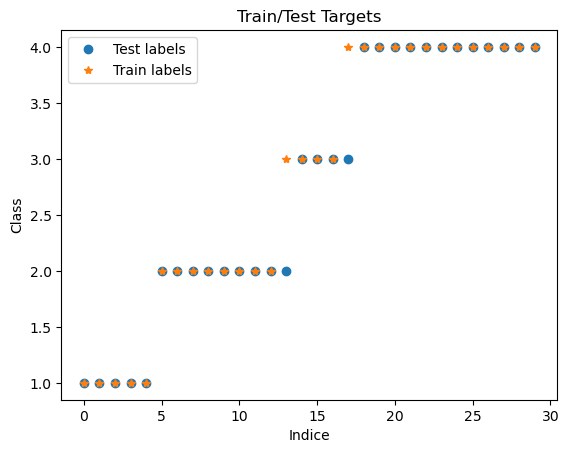

In [ ]:
plt.plot(range(len(y_test)), y_test, 'o', label='Test labels')
plt.plot(range(len(y_train)), y_train, '*', label='Train labels')
plt.legend(loc='upper right', fontsize='medium')
plt.title("Train/Test Targets")
plt.legend()
plt.xlabel('Indice')
plt.ylabel('Class')
plt.show()

# Scale the data using standardization

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Logistic Regression Model

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga'],
              'max_iter': [100, 500, 1000]}
logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)
y_pred = grid_search.predict(X_test)

Best hyperparameters:  {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best accuracy score:  0.9333333333333333


In [ ]:
with open('Logistic_Regression.pkl', 'wb') as file:
    pickle.dump(grid_search, file)

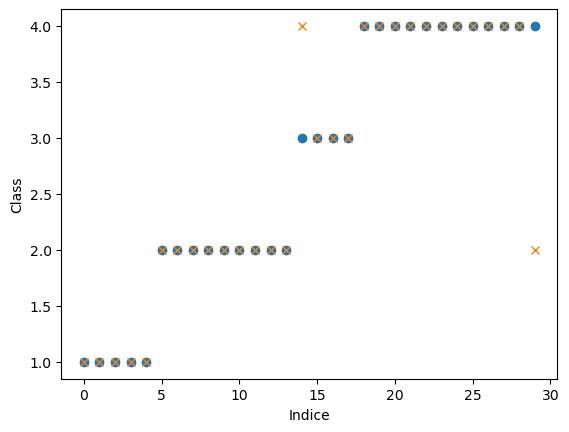

Accuracy: 0.9333333333333333


In [ ]:
plt.plot(range(len(y_test)), y_test, 'o', label='True labels')
plt.plot(range(len(y_pred)), y_pred, 'x', label='Predicted labels')
plt.xlabel('Indice')
plt.ylabel('Class')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Naive Bayesin

In [ ]:
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7]}
naive_bayes = GaussianNB()
grid_search = GridSearchCV(naive_bayes, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_nb = grid_search.best_estimator_
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)
y_pred = best_nb.predict(X_test)

Best hyperparameters:  {'var_smoothing': 1e-09}
Best accuracy score:  0.8333333333333334


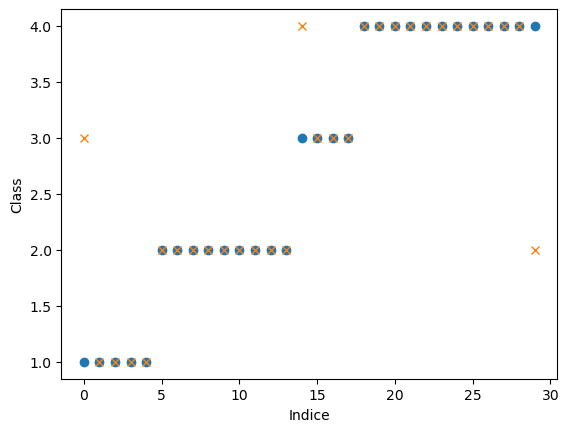

Accuracy: 0.9


In [ ]:
plt.plot(range(len(y_test)), y_test, 'o', label='True labels')
plt.plot(range(len(y_pred)), y_pred, 'x', label='Predicted labels')
plt.xlabel('Indice')
plt.ylabel('Class')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Random Forest Model

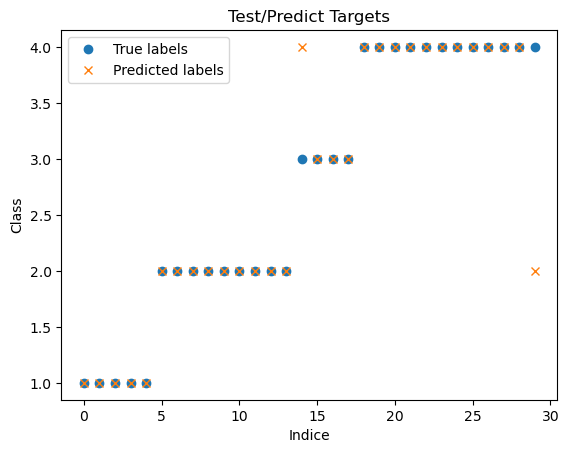

Accuracy: 0.9333333333333333


In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
plt.plot(range(len(y_test)), y_test, 'o', label='True labels')
plt.plot(range(len(y_pred)), y_pred, 'x', label='Predicted labels')
plt.legend(loc='upper left', fontsize='medium')
plt.title("Test/Predict Targets")
plt.xlabel('Indice')
plt.ylabel('Class')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

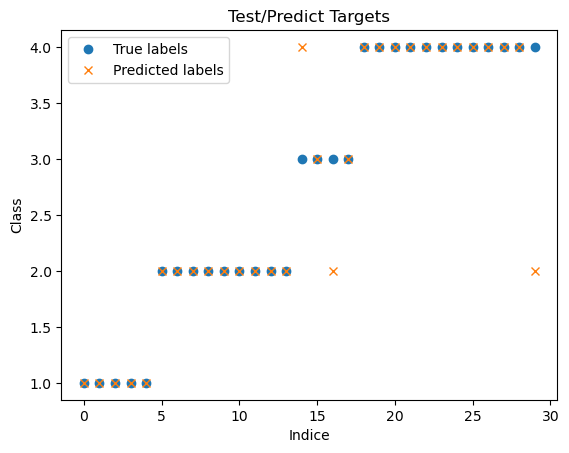

Accuracy: 0.9


# Nearest Neighbors

In [ ]:
param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)
y_pred = best_knn.predict(X_test)

Best hyperparameters:  {'n_neighbors': 3}
Best accuracy score:  0.8


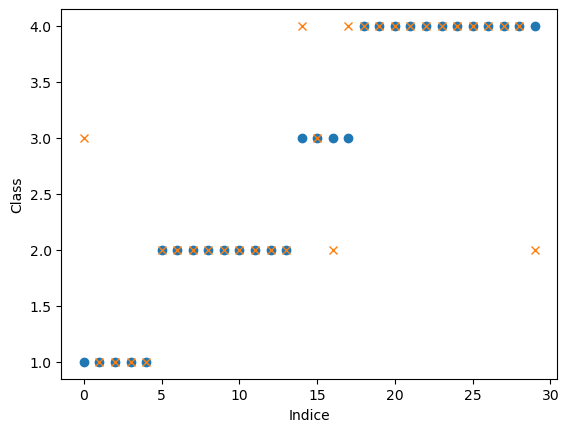

Accuracy: 0.8333333333333334


In [ ]:
plt.plot(range(len(y_test)), y_test, 'o', label='True labels')
plt.plot(range(len(y_pred)), y_pred, 'x', label='Predicted labels')
plt.xlabel('Indice')
plt.ylabel('Class')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Linear Descriminate Analysis

In [ ]:
param_grid = {'solver': ['svd', 'lsqr']}
lda = LinearDiscriminantAnalysis()
grid_search = GridSearchCV(lda, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_lda = grid_search.best_estimator_
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)
y_pred = best_lda.predict(X_test)

Best hyperparameters:  {'solver': 'svd'}
Best accuracy score:  0.8333333333333334


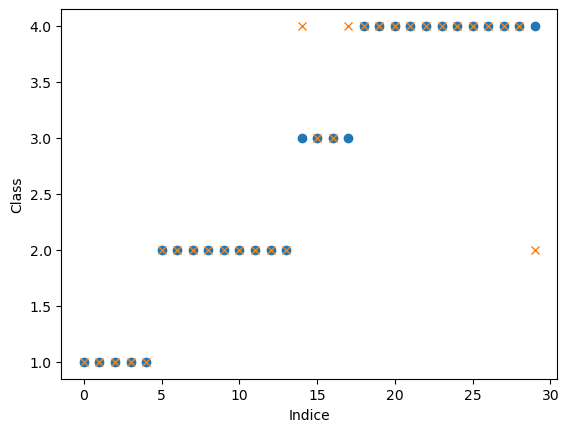

Accuracy: 0.9


In [ ]:
plt.plot(range(len(y_test)), y_test, 'o', label='True labels')
plt.plot(range(len(y_pred)), y_pred, 'x', label='Predicted labels')
plt.xlabel('Indice')
plt.ylabel('Class')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Decision trees

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 5, 10]}
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)
y_pred = best_dt.predict(X_test)

Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 5}
Best accuracy score:  0.8333333333333334


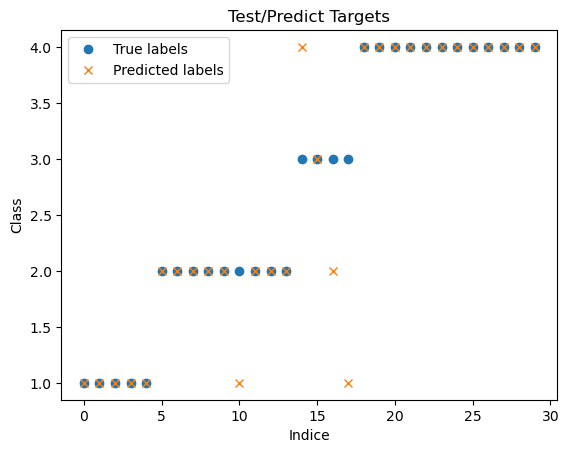

Accuracy: 0.8666666666666667


In [ ]:
plt.plot(range(len(y_test)), y_test, 'o', label='True labels')
plt.plot(range(len(y_pred)), y_pred, 'x', label='Predicted labels')
plt.legend(loc='upper left', fontsize='medium')
plt.title("Test/Predict Targets")
plt.xlabel('Indice')
plt.ylabel('Class')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Artificial Neural Networks

In [ ]:
param_grid = {'hidden_layer_sizes': [(100,), (50,50)], 'activation': ['relu', 'tanh'], 'max_iter': [100, 500, 1000]}
mlp = MLPClassifier()
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_mlp = grid_search.best_estimator_
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)
y_pred = best_mlp.predict(X_test)

Best hyperparameters:  {'activation': 'relu', 'hidden_layer_sizes': (100,), 'max_iter': 100}
Best accuracy score:  0.9666666666666666


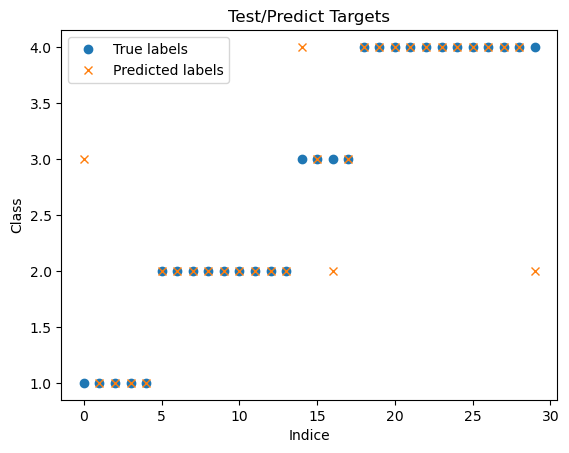

Accuracy: 0.8666666666666667


In [ ]:
plt.plot(range(len(y_test)), y_test, 'o', label='True labels')
plt.plot(range(len(y_pred)), y_pred, 'x', label='Predicted labels')
plt.legend(loc='upper left', fontsize='medium')
plt.title("Test/Predict Targets")
plt.xlabel('Indice')
plt.ylabel('Class')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Support Vector Machine

In [ ]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_svm = grid_search.best_estimator_
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)
y_pred = best_svm.predict(X_test)

Best hyperparameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy score:  0.9333333333333333


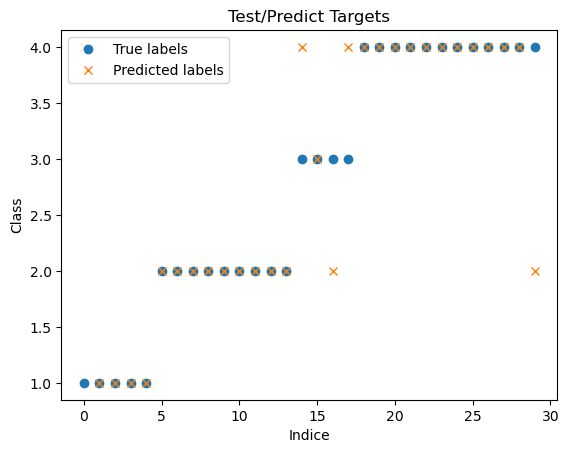

Accuracy: 0.8333333333333334


In [ ]:
plt.plot(range(len(y_test)), y_test, 'o', label='True labels')
plt.plot(range(len(y_pred)), y_pred, 'x', label='Predicted labels')
plt.legend(loc='upper left', fontsize='medium')
plt.title("Test/Predict Targets")
plt.xlabel('Indice')
plt.ylabel('Class')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Ensemble methods using VotingClassifier

In [ ]:
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()
ensemble_model = VotingClassifier(estimators=[('lr', lr_model), ('dt', dt_model), ('knn', knn_model)], voting='hard')
ensemble_model.fit(X_train, y_train)
accuracy = ensemble_model.score(X_test, y_test)
print("Accuracy of ensemble model using VotingClassifier:", accuracy)

Accuracy of ensemble model using VotingClassifier: 0.8666666666666667


# Ensemble methods using BaggingClassifier

In [ ]:
dtc = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=dtc, n_estimators=10, max_samples=0.5, max_features=0.5)
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7666666666666667


# Ensemble methods using StackingClassifier

In [ ]:
models = [('lr', LogisticRegression()), ('knn', KNeighborsClassifier()), ('svm', SVC())]
meta_model = LogisticRegression()
ensemble = StackingClassifier(estimators=models, final_estimator=meta_model)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8333333333333334


# Ensemble methods using BoostingClassifier

In [ ]:
boost = AdaBoostClassifier(n_estimators=50)
boost.fit(X_train, y_train)
y_pred = boost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


# Deploying Model

In [ ]:
import pickle
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(rfc, file)